# Pytorch Basics
Helpful functions: 
- https://pytorch.org/docs/stable/generated/torch.reshape.html
- https://pytorch.org/docs/stable/generated/torch.mean.html
- https://pytorch.org/docs/stable/generated/torch.cat.html
- https://pytorch.org/docs/stable/generated/torch.nn.functional.mse_loss.html

In [5]:
import torch
import torch.nn
from torchtyping import TensorType



class Solution:
    def reshape(self, to_reshape: TensorType[float]) -> TensorType[float]:
        
        rows, columns = to_reshape.shape
        res = torch.reshape(to_reshape, ((rows * columns)//2, 2))

        return torch.round(res, decimals = 4)


    def average(self, to_avg: TensorType[float]) -> TensorType[float]:

        return torch.round(torch.mean(to_avg, axis = 0), decimals = 4)


    def concatenate(self, cat_one: TensorType[float], cat_two: TensorType[float]) -> TensorType[float]:
        return torch.round(torch.concat((cat_one, cat_two), dim = 1), decimals = 4)

    def get_loss(self, prediction: TensorType[float], target: TensorType[float]) -> TensorType[float]:
        
        return torch.round( torch.nn.functional.mse_loss(prediction, target), decimals = 4)


---


## Constructing a neural network in pytorch given its diagram 
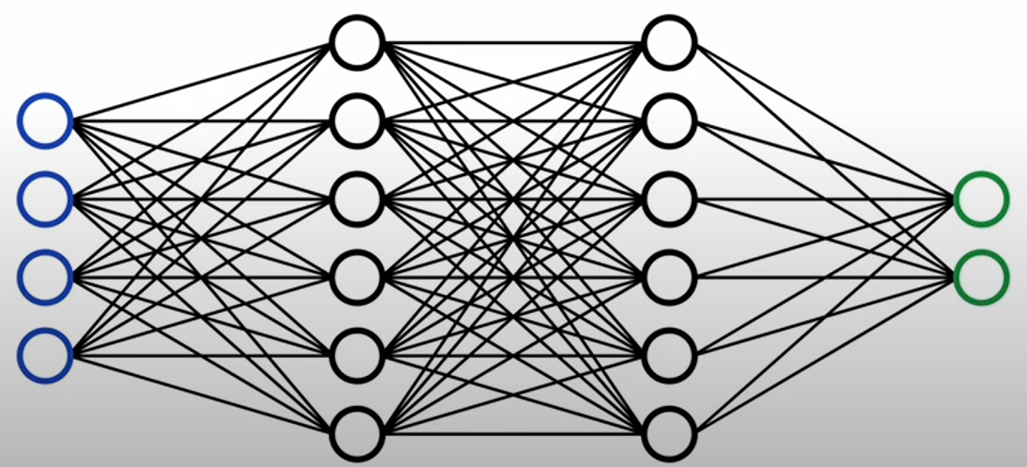

In [1]:
import torch
import torch.nn as nn

In [4]:
# Constructing the above neural network in pytorch 

class NeuralModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.first_hidden_layer = nn.Linear(4, 6)
        self.second_hidden_layer = nn.Linear(6, 6)
        self.output_layer = nn.Linear(6, 2)

    def forward(self, x):
        return self.output_layer(self.second_hidden_layer(self.first_hidden_layer(x)))

---

# Digit Classifier
Implementing a neural network that can recognize black and white images of handwritten digits.

In [ ]:
import torch 
import torch.nn as nn
from torchtyping import TensorType

class Solution(nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(0)

        self.first_layer = nn.Linear(784, 512 )
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.final_layer = nn.Linear(512, 10)
        self.sigmoid = nn.Sigmoid()

    def forward(self, images:TensorType[float]) -> TensorType[float]:
        torch.manual_seed(0)
        return torch.round(self.sigmoid(self.final_layer(self.dropout(self.relu(self.first_layer(images))))), decimals= 4)

## Natural Language Processing
In this problem, you will load in a raw body of text and set it up for training. ChatGPT uses the entire text of the internet for training, but in this problem we will use Amazon product reviews and Tweets from X.

Your task is to encode the input dataset of strings as an integer tensor of size 
2
⋅
N
×
T
2⋅N×T, where 
T
T is the length of the longest string. The lexicographically first word should be represented as 1, the second should be 2, and so on. In the final tensor, list the positive encodings, in order, before the negative encodings.

Inputs:

positive - a list of strings, each with positive emotion
negative - a list of strings, each with negative emotion

In [ ]:
import torch
import torch.nn as nn
from torchtyping import TensorType

class Solution:
    def get_dataset(self, positive: List[str], negative: List[str]) -> TensorType[float]:
        
        words = set()
        all_text = positive + negative

        for sentence in all_text:
            for word in sentence.split():
                words.add(word)

        sorted_list = sorted(list(words))
        word_to_num = {}

        for index, word in enumerate(sorted_list):
            word_to_num[word] = index+1

        
        # Encoding the input to build the dataset
        def encode(sentence):
            encoded_sentence = []

            for word in sentence.split():
                encoded_sentence.append(word_to_num[word])
            return encoded_sentence
            
        var_len_tensors = []

        for sentence in all_text:
            var_len_tensors.append(torch.tensor(encode(sentence)))

        return nn.utils.rnn.pad_sequence(var_len_tensors, batch_first= True)


## Sentiment Analysis
Your task is to implement a neural network that can recognize positive or negative emotion in an input sentence. This application of work embeddings is the first step in building ChatGPT. To learn more about word embeddings, check out this video.

The background video is critical to completely understanding the ML concepts involved in this problem.

For the model architecture, first use an embedding layer of size 16. Compute the average of the embeddings to remove the time dimension, and end with a single-neuron linear layer followed by a sigmoid. The averaging is called the "Bag of Words" model in NLP.

Implement the constructor and forward() pass that outputs the model's prediction as a number between 0 and 1 (completely negative vs. completely positive). Do not train the model.

In [ ]:
import torch
import torch.nn as nn 
from torchtyping import TensorType

class Solution(nn.Module):
    def __init__(self, vocabulary_size: int):
        super().__init__()
        torch.manual_seed(0)
        self.embedding = nn.Embedding(vocabulary_size, 16)
        self.linear = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x: TensorType[int]) -> TensorType[float]:
        embedding_layer = self.embedding(x)
        averaged = torch.mean(embedding_layer, axis = 1)
        hidden_layer = self.linear(averaged)
        output = self.sigmoid(hidden_layer)

        return torch.round(output, decimals=4)
